<font size='5' color='red'>ch02 영상 기본 연산</font>
# 1절. 영상기본정보

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('data/openCV/lena.jpg',
#                 cv2.IMREAD_ANYCOLOR 생략가능 생략시 3개(color) 채널로 가져옴
                )
print('img.shape', img.shape)
print('img[0,0]', img[0,0])
print('dtype :', img.dtype)
print('img의 size :', img.size)

img.shape (512, 512, 3)
img[0,0] [127 136 226]
dtype : uint8
img의 size : 786432


In [4]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
height, width = img.shape
print(height, width)

512 512


In [8]:
# 짝수번째 행을 0으로 처리
for y in range(height):
    for x in range(width):
        if y%2==0:
            img[y, x] = 0

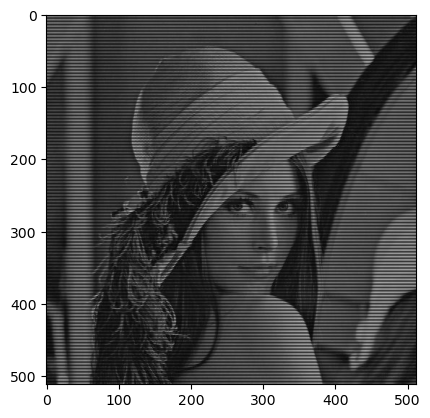

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

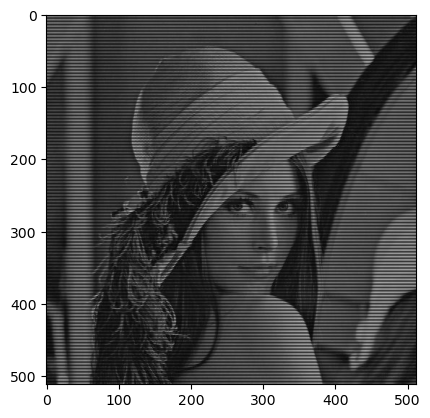

In [11]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 짝수번째 행은 0으로 처리
for y in range(height):
    if y%2==0:
        for x in range(width):
            img[y, x]=0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

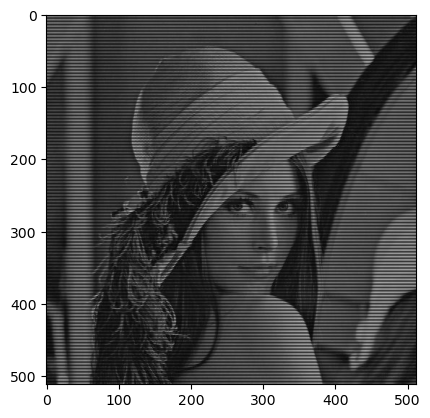

In [12]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 짝수번째 행은 0으로 처리
img[0::2, :]=0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

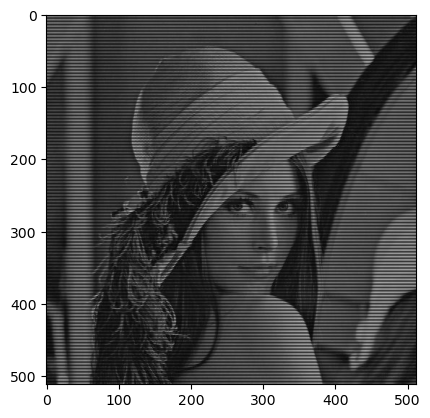

In [13]:
img = cv2.imread('data/openCV/lena.jpg', cv2.IMREAD_GRAYSCALE)
# 짝수번째 행은 0으로 처리
img[0::2, ...]=0
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.show()

# 2절. 기본연산
## 2.1 이미지 채널

In [16]:
img = cv2.imread('data/openCV/lena.jpg')
# b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
b, g, r = cv2.split(img)
print('img :', img.shape)
print('b.shape', b.shape)
print('g.shape', g.shape)
print('r.shape', r.shape)
print(np.mean(b), np.mean(g), np.mean(r))

img : (512, 512, 3)
b.shape (512, 512)
g.shape (512, 512)
r.shape (512, 512)
105.54556274414062 98.9676513671875 180.31714248657227


In [18]:
# 이미지의 빨간 채널만 활성화
img[:,:,[0,1]] = 0;
cv2.imshow('red chanel', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
# 원본, B, G, R 채널 활성화
img = cv2.imread('data/openCV/lena.jpg')
cv2.imshow('img', img)

imgR =img.copy() # 깊은복사
imgR[:,:,[0,1]] = 0
cv2.imshow('imgR', imgR)

imgG = img.copy()
imgG[:,:,[0,2]] = 0
cv2.imshow('imgG', imgG)

imgB = img.copy()
imgB[:,:,[1,2]] = 0
cv2.imshow('imgB', imgB)

cv2.waitKey(0)
cv2.destroyAllWindows()

## 2.2 크기조절

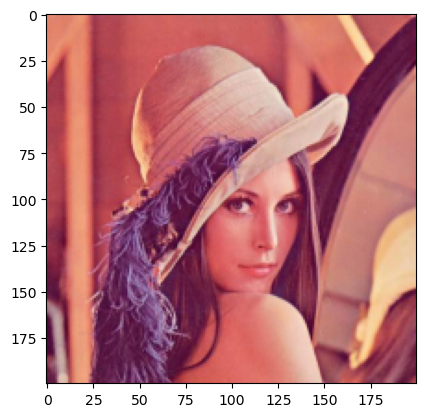

In [11]:
# 특정 pixel 길이로 변경
img = cv2.imread('data/openCV/lena.jpg')
height, width, chanel = img.shape
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
dst = cv2.resize(img, dsize=(200,200), interpolation = cv2.INTER_AREA)
plt.imshow(dst)
plt.show()

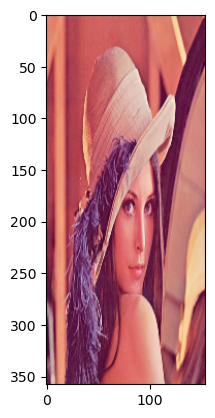

In [14]:
# 특정 비율로 조정
dst2 = cv2.resize(img, dsize=(0,0), # 기본으로 작성해야함 
                  fx=0.3, # 가로사이즈 비율
                  fy=0.7, # 세로사이즈 비율
                  interpolation= cv2.INTER_LINEAR
                 )
plt.imshow(dst2)
plt.show()

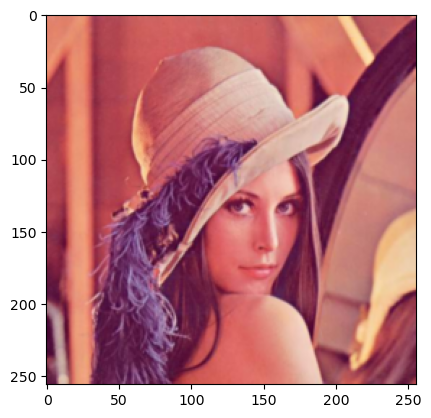

In [15]:
# 2배 축소 (메모리는 1/4로 축소)
dst3 = cv2.pyrDown(img)
plt.imshow(dst3)
plt.show()

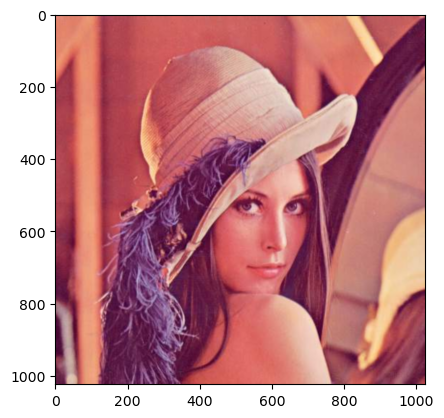

In [22]:
# 2배 확대 
dst4 = cv2.pyrUp(img)
plt.imshow(dst4)
plt.show()

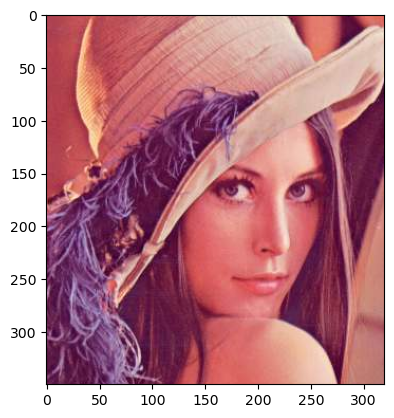

In [27]:
# 이미지 자르기
dst5 = img[100: 450, 90:410]
plt.imshow(dst5)
plt.show()

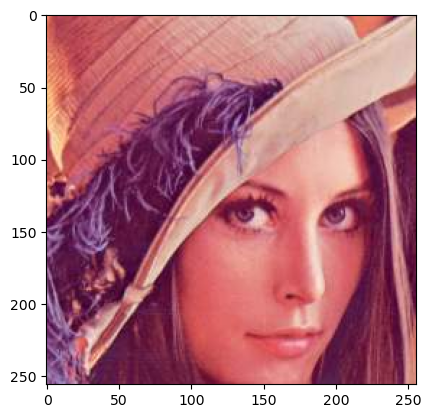

In [29]:
# 이미지의 센터만 추출
dst6 = img[int(height/4):int(height*3/4), int(width/4):int(width*3/4)]
plt.imshow(dst6)
plt.show()

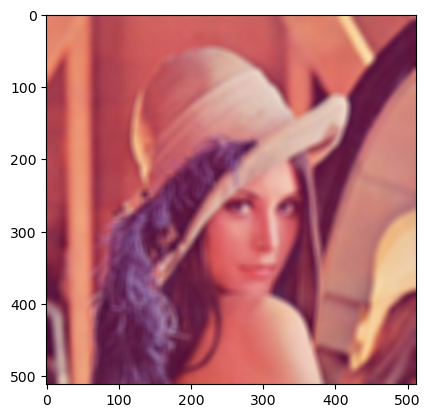

In [31]:
# blur 처리
dst7 = cv2.blur(img, (10,10))
plt.imshow(dst7)
plt.show()

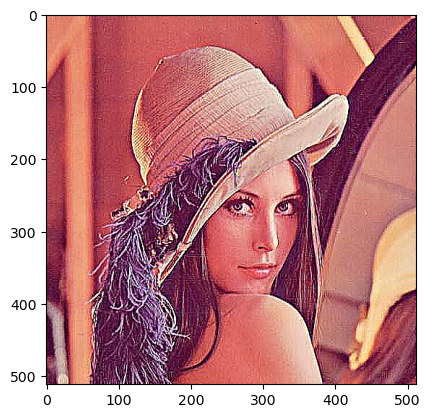

In [33]:
# 이미지를 선명하게
kernel = np.array([[-1, -1, -1], # 전체적으로 선명하게 보임
                   [-1,  9, -1],
                   [-1, -1, -1]])
# kernel = np.array([[0, 0, 0], # 가로가 더 도드라지게 보임
#                    [1, 1, 1],
#                    [0, 0, 0]])
dst8 = cv2.filter2D(img, -1, kernel)
plt.imshow(dst8)
plt.show()

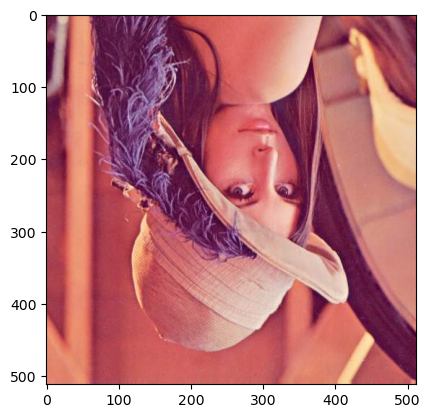

In [37]:
# 대칭 (상하반전)
dst9 = cv2.flip(img, 0)
plt.imshow(dst9)
plt.show()

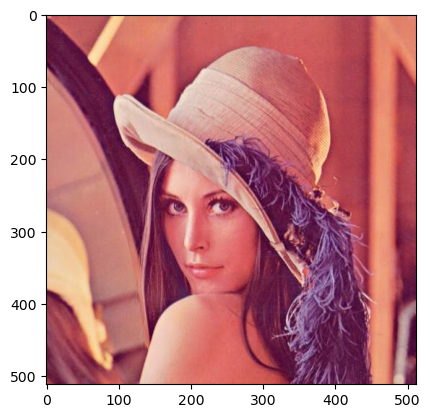

In [38]:
# 대칭 (좌우반전)
dst9 = cv2.flip(img, 1)
plt.imshow(dst9)
plt.show()

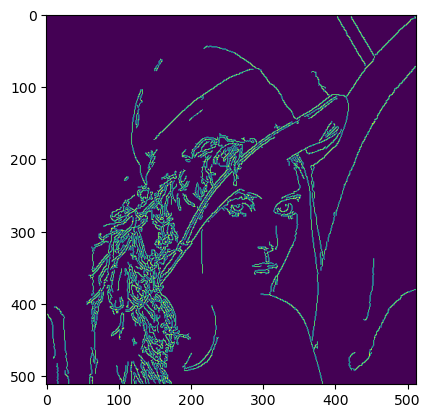

In [39]:
# 경계추출
dst10 = cv2.Canny(img, 100, 300) # 100~300 사이즈 임계치(리밋)값만 추출 
plt.imshow(dst10)
plt.show()

# 2.3 이미지 합치기 (겹치기)

In [4]:
img1 = cv2.imread('data/openCV/ch2_flower1.jpg')
img2 = cv2.imread('data/openCV/ch2_flower2.jpg')
cv2.imshow('flower1', img1)
cv2.imshow('flower2', img2)
cv2.imshow('np.add', np.add(img1, img2))
cv2.imshow('cv2.add', cv2.add(img1, img2))

cv2.waitKey(0)
cv2.destroyAllWindows()